# Homework Assignment #4 (Individual)
## Regression and SVM Predictive Models

### <p style="text-align: right;"> &#9989; Anthony McCollom</p>
### <p style="text-align: right;"> &#9989; mccoll58</p>

### Goal for this homework assignment
By now, you have learned a bit about predictive models. In this assignment, you will practice:

* Building predictive models using `statsmodels` and `sklearn`
* Evaluating your predictive models

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, April 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


---
## Part 0: Add to your Git repository to track your progress on your assignment (4 points)

For this assignment, you're going to add it to the `cmse202-s23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s23-turnin` repository and create a new directory called `hw-04`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s23-turnin`" repository inside the `hw-04` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

git clone https://github.com/mccoll58/CMSE202-s23-turnin.git

# Building a Model to Predict if it Will Rain Tomorrow

In this dataset we have weather data for a number of Australian cities. We’re going to **build a model that uses data from today to predict if it will rain tomorrow.** To simplify our model, let’s just look at the weather for one city.

## Part 1. Working with the Data

The dataset that we’ll be using can be found here:
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW4/aussie_weather_data.csv`

#### 1.1 (3 Points)
**Download the data set and read it in using Pandas.**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [18]:
#Write your code here
import pandas as pd
df = pd.read_csv('weather')
df

,Year,Month,DayOfMonth,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009,1,1,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,112.5,...,84.0,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,0,0
1,2009,1,2,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,90.0,...,79.0,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,0,0
2,2009,1,3,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,0.0,...,87.0,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,0,1
3,2009,1,4,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,337.5,...,92.0,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,1,1
4,2009,1,5,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,337.5,...,86.0,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39510,2017,6,20,Darwin,19.3,33.4,0.0,6.0,11.0,22.5,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
39511,2017,6,21,Darwin,21.2,32.6,0.0,7.6,8.6,0.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
39512,2017,6,22,Darwin,20.7,32.8,0.0,5.6,11.0,0.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
39513,2017,6,23,Darwin,19.5,31.8,0.0,6.2,10.6,337.5,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


#### 1.2 (3 Points)
This dataset has weather information for multiple cities in Australia. It’s quite a large dataset. In fact, it’s a little *too* large for our purposes; it will take a considerable amount of time to train a model on so much data. So we’ll just work with the data for a specific city.

The first thing we’ll do is see which cities we have data for. 
**Print out a list of the specific cities in this dataset.** (Note that this is not the same as printing the entire `Location` column.)

In [19]:
#Write your code here
pd.unique(df['Location'])

array(['NorfolkIsland', 'SydneyAirport', 'WaggaWagga', 'MelbourneAirport',
       'Mildura', 'Watsonia', 'Brisbane', 'Cairns', 'Townsville',
       'MountGambier', 'Nuriootpa', 'PerthAirport', 'Perth',
       'AliceSprings', 'Darwin'], dtype=object)

#### 1.3 (3 Points)
Select one of the cities (and **please** don't just pick the first one!). Cut down your dataframe so that it only contains data from your chosen city. You should also **look through the columns in this dataset and ensure that all of the data is ready for our analysis/model creation.**

In [86]:
#Write your code here
Perth_mask = df['Location']=='Perth'
Perth = df[Perth_mask]
Perth

,Year,Month,DayOfMonth,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
31205,2008,7,2,Perth,6.4,20.7,0.0,1.8,7.0,67.5,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,0,0
31206,2008,7,4,Perth,9.5,19.2,1.8,1.2,4.7,180.0,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,1,1
31207,2008,7,5,Perth,9.5,16.4,1.8,1.4,4.9,202.5,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,1,1
31208,2008,7,6,Perth,0.7,15.9,6.8,2.4,9.3,45.0,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,1,0
31209,2008,7,7,Perth,0.7,18.3,0.0,0.8,9.3,90.0,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34225,2017,6,21,Perth,10.3,19.9,0.2,1.8,7.5,135.0,...,89.0,60.0,1017.1,1013.8,5.0,6.0,13.0,18.5,0,1
34226,2017,6,22,Perth,13.0,16.8,61.2,3.6,0.0,247.5,...,90.0,75.0,1005.6,1008.9,7.0,7.0,16.4,15.6,1,0
34227,2017,6,23,Perth,13.3,18.9,0.4,1.8,6.5,315.0,...,85.0,65.0,1019.2,1019.4,6.0,6.0,15.1,18.0,0,0
34228,2017,6,24,Perth,11.5,18.2,0.0,3.8,9.3,315.0,...,62.0,47.0,1025.9,1023.4,1.0,3.0,14.0,17.6,0,0


#### 1.4 (3 Points)
Finally, before we start creating our models, let's first split our data into training and testing datasets. **Keep in mind what we want our model to predict and how this dataset gives you the information you need for your model.**

In [87]:
#Write your code here
tom = Perth['RainTomorrow']
Perth1 = Perth.drop(columns = ['RainTomorrow','Location'],axis = 1)
Perth1
X_train, X_test, y_train, y_test = train_test_split(Perth1, tom, test_size = .25, random_state=42)
X_train

,Year,Month,DayOfMonth,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
33559,2015,7,31,15.8,21.5,18.4,1.6,0.0,292.5,33.0,...,13.0,98.0,60.0,1013.4,1010.7,7.0,5.0,16.8,20.6,1
32241,2011,8,19,5.7,23.9,0.0,2.4,10.5,67.5,30.0,...,15.0,57.0,28.0,1019.2,1015.6,0.0,1.0,14.8,23.1,0
32092,2011,2,1,17.9,29.8,0.4,6.8,12.4,225.0,35.0,...,19.0,51.0,44.0,1012.6,1008.7,0.0,0.0,20.7,27.4,0
34185,2017,5,8,13.3,26.4,0.0,4.0,7.8,90.0,24.0,...,13.0,56.0,67.0,1020.6,1017.0,7.0,7.0,18.1,24.1,0
32466,2012,4,10,14.5,35.4,0.0,3.6,10.4,67.5,31.0,...,11.0,44.0,22.0,1023.2,1019.8,6.0,2.0,24.9,33.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32843,2013,7,17,9.1,14.6,12.6,2.4,8.5,225.0,61.0,...,17.0,64.0,52.0,1020.4,1020.6,1.0,3.0,10.7,13.6,1
32300,2011,10,21,9.7,30.0,0.0,7.6,11.5,225.0,39.0,...,9.0,28.0,13.0,1018.6,1013.2,0.0,1.0,22.5,28.9,0
32335,2011,11,29,13.4,24.3,0.2,6.8,13.4,225.0,44.0,...,22.0,44.0,44.0,1018.4,1016.4,1.0,1.0,17.4,22.1,0
32499,2012,5,18,9.4,23.8,0.0,2.0,9.4,67.5,20.0,...,9.0,74.0,46.0,1023.9,1022.3,1.0,3.0,16.5,21.5,0


## 2.0 Building a Regression Model

#### 2.1 (3 Points)
We’ll start by creating a regression model. **Does it make sense for us to use linear regression or logistic regression? Explain your choice.**

Log because it is used to predict and classify whether it will rain or not rain.

#### 2.2 (12 Points)
Create a regression model. Use the model summary to determine which parameters are most statistically significant in your model. If you get an error during at this stage it may be helpful to go back to part 1.3 and ensure that all of your data is appropriate for creating a model. 

In [89]:
#Write your code here
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.234203
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                 2268
Model:                          Logit   Df Residuals:                     2244
Method:                           MLE   Df Model:                           23
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                  0.5372
Time:                        16:48:36   Log-Likelihood:                -531.17
converged:                       True   LL-Null:                       -1147.8
Covariance Type:            nonrobust   LLR p-value:                2.624e-246
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           149.5378     65.445      2.285      0.022      21.267     277.809
Year              0.

 const, MinTemp, Evaporation, Sunshine, WindGustSpeed,WindDir9am, WindDir3pm,Humidity3pm, Pressure9am, Pressure3pm because the P value was below.05

#### 2.3 (8 Points)
**Fit your test data and create/print a confusion matrix. We’ll use this to evaluate how well your predicitve model performs.**

Optimization terminated successfully.
         Current function value: 0.237359
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                 2268
Model:                          Logit   Df Residuals:                     2258
Method:                           MLE   Df Model:                            9
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                  0.5310
Time:                        17:17:15   Log-Likelihood:                -538.33
converged:                       True   LL-Null:                       -1147.8
Covariance Type:            nonrobust   LLR p-value:                9.658e-257
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           236.2038     21.165     11.160      0.000     194.722     277.686
MinTemp          -0.

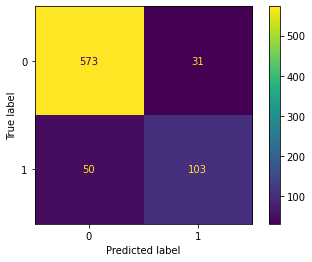

array([[573,  31],
       [ 50, 103]])

In [109]:
#Write your code here
# important pvalue only
Perth2 = Perth1.drop(columns = ['Year','Month','DayOfMonth','MaxTemp','Rainfall','WindGustDir','WindSpeed9am','WindSpeed3pm','Humidity9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(Perth2, tom, test_size = .25, random_state=42)

logit_model = sm.Logit(y_train1, sm.add_constant(X_train1))
result = logit_model.fit()
print(result.summary())

prediction = result.predict(sm.add_constant(X_test1))
prediction = prediction > 0.5

cm = confusion_matrix(y_test1, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
cm

#### 2.4 (3 Points)
Look at/calculate the Precision and Recall of your model. **Which one is greater? Describe in plain language what that means about the performance of your model (I.e., the circumstances in which it does/doesn’t do well).**

In [110]:
# Precision = true positive/(true positive+false positive)
Precision = 550/(550+50)
# Recall = true positive/(true positive+false negative)
Recall = 550/(550+31)
print(Precision,Recall)

0.9166666666666666 0.9466437177280551


Recall is greater meaning my model is pretty accurate at predicting when it will rain with a Recall of 91% vs a 95% recall. This means we over predict rain which is good because it is a conservative model.

## 3.0 Interlude: A Base Rate Frequency Model (12 Points)

If we didn't create a fancy model for predicting future rainfall, would that mean that we had *no way* of predicting if it would rain? Of course not. There's always *some* kind of model we can use (they just won't be very sophisticated). 

In the case of our problem--predicting whether it will rain tomorrow--what is the simplest model we could use? We'd need to look at the **base rate frequency**. If we know that, over the course of the year, it rains ~30% of the time, that would be our base rate frequency. If we were to guess that it would be sunny every day of the year, we'd be wrong ~30% of the time, *but we'd be right ~70% of the time.* 

Why is this important? Imagine we create a sophisticated model that accurately predicts rain/no rain ~60% of the time; without any other information, we might think, "That's not too bad, I guess." It certainly feels better than *no* information, right? Now think about the base rate frequency model, which achieves an accuracy of **70%** just by guessing the same thing every time. Suddenly, our sophisticated model seems like crap! It tells us we could be doing ~10% better than our fancy model by guessing. This is why we use the base rate frequency as a simple way to test our models.


**Calculate how frequently it rains in your city. If you were to guess that it *wasn't* going to rain every day, how frequently would you be right? (We'll use this as our baseline model.)**


In [117]:
#Write your code for calculating the frequency of rain here.
rain = Perth['RainTomorrow']
Freq = 1 - (len(Perth[Perth['RainTomorrow'] > 0])/len(Perth)) 
Freq
# calculating percentage
#100-79.6

0.7963636363636364

It rains about 79.6% of the time in Perth. This means it doesn't rain 20.4% of the time meaning we'd be right about the 20.4% time with no rain.

---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

## 4.0 SVM Model

We’ve seen how regression faired in predicting rain; now let’s give Support Vector Machines a shot. 

It’s not clear, *a priori*, which type of kernel (linear or RBF) would fair better. Therefore, we’ll need to test out both kernel types, as well as multiple values for hyperparameters ($C$ and $\gamma$). 

#### 4.1 (12 Points)
Run a grid search over both types of kernels and multiple values of $C$ and $\gamma$ (we recommend [0.01,0.1,1.0,10.0] for both). We *STRONGLY* recommend you set the parameter `n_jobs=-1` in `GridSearchCV`, which will distribute the computational load. Make sure to write down your best-fit hyperparameters. 

In [ ]:
#Write your code here

*Write down your best fir hyper-parameters here.*

#### 4.2 (8 Points)
Using your best-fit parameters, classify your test data and print off the confusion matrix. Note/calculate the Precision and Recall for your SVM model, as well as the overall accuracy.

$\mathrm{Accuracy} = \frac{\mathrm{Accurate~Predictions}}{\mathrm{Total~Samples}}$.

In [ ]:
#Write your code here

## 5. Evaluation of Models

Here we’re going to investigate how well our predictive models actually work.


#### 5.1 (5 Points)

Compare the accuracy of both of your predictive models (regression and SVM) to the baseline model from part 3. Do your predictive models do better than the baseline model? Is their performance relative to the baseline model what *you* would expect? 


*Write down your response here.*

#### 5.2 (5 Points)

Let’s test the robustness of your model. Before you do anything, you should record the precision, recall, and accuracy of your two predictive models (if you haven’t already). Once you’ve done that, go all the way back to part 1.4 and change the random seed for `train_test_split`. Using this new data split, rerun all of your code from parts 2 and 4. For each new random seed, record the precision, recall, and accuracy for both models (and write them, as well as the random seed, in the cell below!). Do this for 3-5 different random seeds. 


*Write down the accuracy, precision, recall, and seed number for each of your iterations.*

#### 5.3 (5 Points)

How much variation did you observe in the precision, recall, and accuracy in your models? After going through this exercise, how (if at all) does this change your response to part 5.1? 

*Write down your response here.*

#### 5.4 (5 Points)

Finally, compare the performance of your regression and SVM models. Which, if any, performed better? Esxplain.

*Write down your response here.*

---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### Congratulations, you're done!

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University